In [3]:
%run "../../shared/utilz_includez.ipynb"

In [13]:
%matplotlib notebook 
from plot_helper import *
from numpy import linalg

[[ 1  1]
 [-1  1]]


<IPython.core.display.Javascript object>


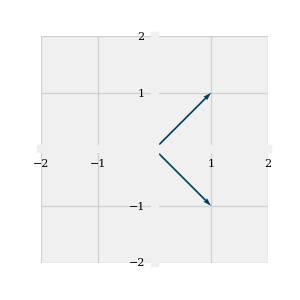

<IPython.core.display.Javascript object>


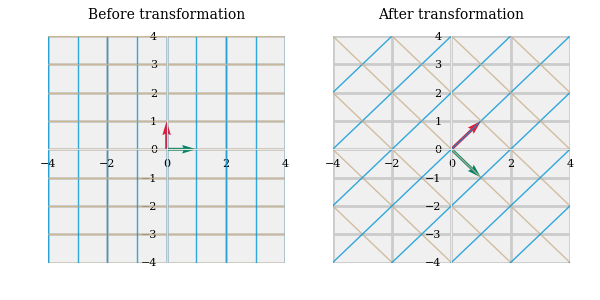

In [11]:
A = np.array( [ [1,1], [-1,1]])
print(A)
plot_vector([A])
plot_linear_transformation(A)

In [6]:
i = np.array( (1,0 ))
j = np.array( (0,1))

In [7]:
a = np.array( (1, -1))
b = np.array ( (1,1) )

In [12]:
for l, x in zip([ 'i', 'j','a', 'b', 'A'], [i, j, a, b, A]):
    print( f"{l} \t {x}" )

i 	 [1 0]
j 	 [0 1]
a 	 [ 1 -1]
b 	 [1 1]
A 	 [[ 1  1]
 [-1  1]]


# Norm
- Computed by pythagorus theorem on the 2-d plane for instance. \mathlb = sqrt( x^2 + y^2)
- Is the magnitude or length of a vector. 
- use np.linalg.norm


<IPython.core.display.Javascript object>


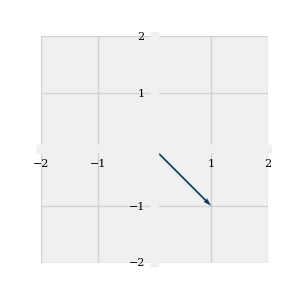

In [14]:
## Length or norm of a vector 
plot_vector([i, a])

In [15]:
linalg.norm( a )

1.4142135623730951

<IPython.core.display.Javascript object>


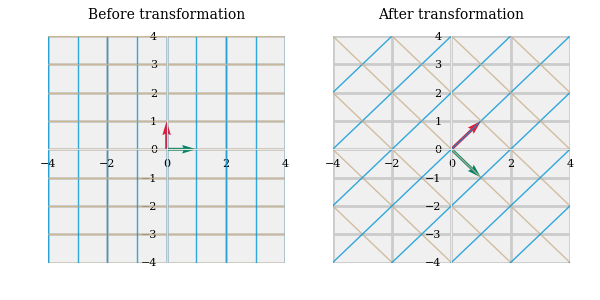

In [16]:
plot_linear_transformation(A) ## <<< is scaled by norm(a) 

A: 
 [[ 1  1]
 [-1  1]]
A_inv: 
 [[ 0.5 -0.5]
 [ 0.5  0.5]]


<IPython.core.display.Javascript object>


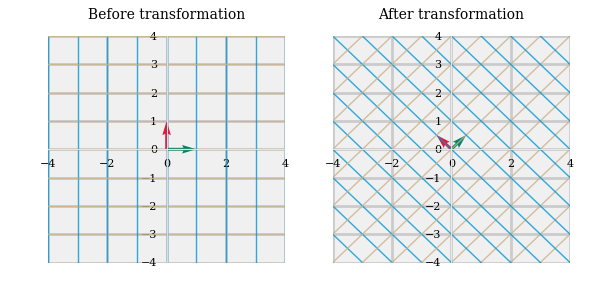

In [17]:
A_inv = linalg.inv(A)
print("A: \n", A)
print("A_inv: \n", A_inv)
plot_linear_transformation(A_inv)

<IPython.core.display.Javascript object>


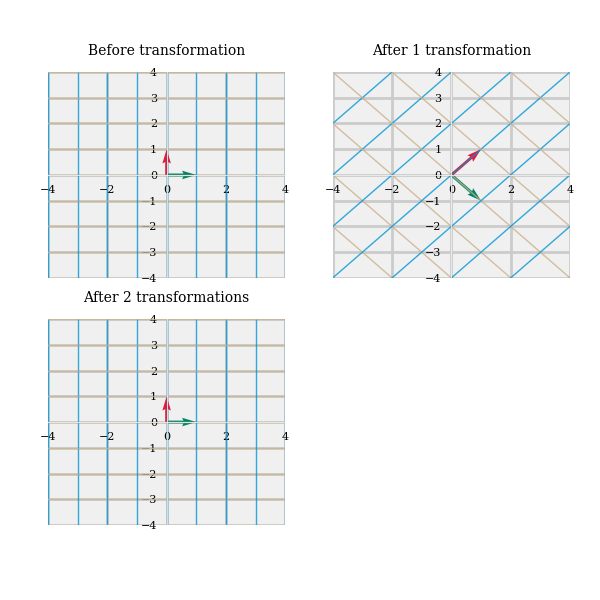

In [18]:
plot_linear_transformations(A, A_inv)

## Special Case: B = B_inv

- Was an early cryptography application 

B: 
 [[ 1  1]
 [ 0 -1]]
B_inv: 
 [[ 1.  1.]
 [-0. -1.]]


<IPython.core.display.Javascript object>


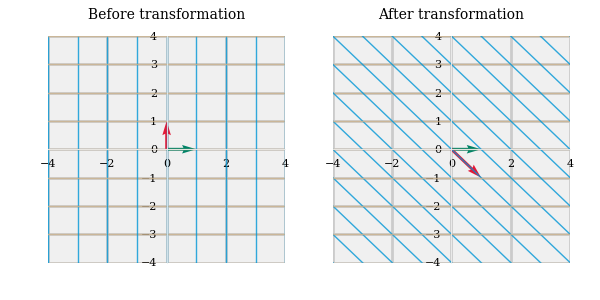

<IPython.core.display.Javascript object>


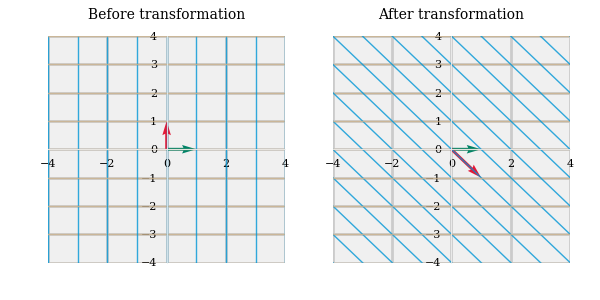

<IPython.core.display.Javascript object>


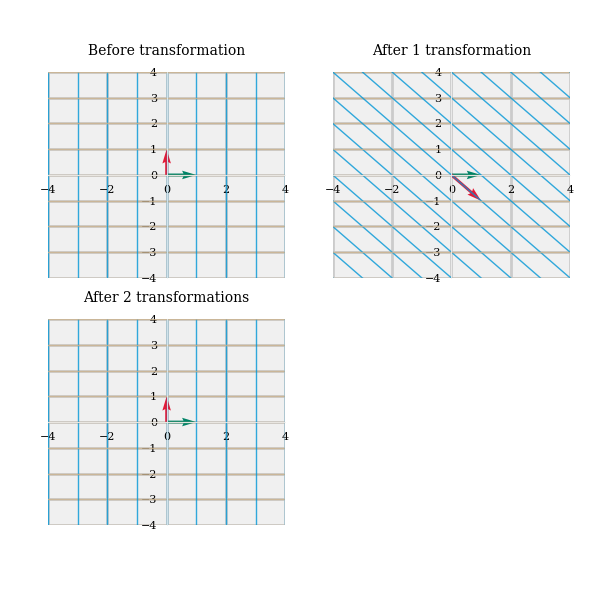

In [21]:
#### Special Case
B = np.array([ [1,1], [0, -1]])
B_inv = linalg.inv(B)

print("B: \n", B)
print("B_inv: \n", B_inv)

plot_linear_transformation(B)
plot_linear_transformation(B_inv)
plot_linear_transformations(B, B_inv)

# Circles
- 

[[2 1]
 [1 2]]


<IPython.core.display.Javascript object>


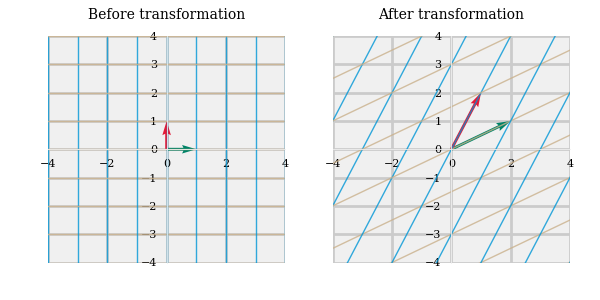

In [22]:
C = np.array([[2,1], [1,2]])
print(C)
plot_linear_transformation(C)

<IPython.core.display.Javascript object>


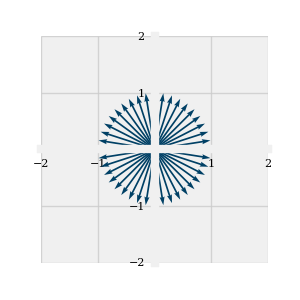

In [35]:
## 1. create a circular space << an array of angles for an array of vectors around the unit space
alpha = np.linspace(0, 2*np.pi, 41) ##origin, unit radius area, n_count
#print( alpha )

## with coords = (cos, sin) of the angles 
vectors = list(zip( np.cos(alpha), np.sin(alpha) ) )
#print(vectors)
plot_vector(vectors)

In [38]:
print( f"C: \n{C}")
print( f"v[0]: {vectors[0]}")
C.dot(vectors[0])

C: 
[[2 1]
 [1 2]]
v[0]: (1.0, 0.0)


array([2., 1.])

<IPython.core.display.Javascript object>


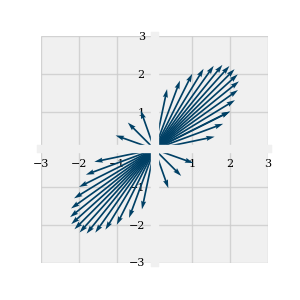

In [40]:
##### ---- EFFECT OF MATRIX C ON EACH VECTOR IN THAT CIRCULAR SPACE 
## Transform every vector in the list
vecs_trans = [ C.dot(x) for x in vectors ]

plot_vector(vecs_trans)

**A 2D matrix transforms a unit circle into an ellipse on the plane** 

## Semi Minor and Semi Major

In [46]:
## Compute the length of each of the new vectors
normz = [ linalg.norm(x) for x in vectors] 
print( normz )

print("\n After Transform by C \n")
trans_normz = [ linalg.norm(x) for x in vecs_trans]
print( trans_normz )

print(f"\n{'-'*15}")
print(f"\nSemi-major = Max @ before {max(normz)} and after C transform {max(trans_normz)}")
print(f"\nSemi-minor = Min @ before {min(normz)} and after C transform {min(trans_normz)}")

[1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0]

 After Transform by C 

[2.23606797749979, 2.497212040956833, 2.7112987679652516, 2.869855044684276, 2.9671916124815088, 3.0, 2.9671916124815088, 2.869855044684276, 2.711298767965252, 2.497212040956833, 2.23606797749979, 1.9400855709221208, 1.6275315636970324, 1.3281310261040553, 1.093514487704386, 1.0, 1.0935144877043859, 1.328131026104055, 1.6275315636970322, 1.94008557092212, 2.2360679774997894, 2.4972120409568324, 2.711298767965252, 2.869855044684276, 2.9671916124815088, 3.0000000000000004, 2.9671916124815083, 2.8698550446842765, 2.711298767965252, 2.497212040956833, 2.23606797749979, 1.940085570922121, 1.627531563697033, 1.3281310261040555, 1.0935144877043863, 1.0, 1.0935144

In [53]:
## SAME THING USING NP elementwise 
normz = linalg.norm(vectors, axis=1)
trans_normz = linalg.norm(vecs_trans, axis=1)
print(normz)
print("\n After Transform by C \n")
print( trans_normz )

print(f"\n{'-'*15}")
print(f"\nSemi-major = Max @ before {max(normz)} and after C transform {max(trans_normz)}")
print(f"\nSemi-minor = Min @ before {min(normz)} and after C transform {min(trans_normz)}")


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

 After Transform by C 

[2.23606798 2.49721204 2.71129877 2.86985504 2.96719161 3.
 2.96719161 2.86985504 2.71129877 2.49721204 2.23606798 1.94008557
 1.62753156 1.32813103 1.09351449 1.         1.09351449 1.32813103
 1.62753156 1.94008557 2.23606798 2.49721204 2.71129877 2.86985504
 2.96719161 3.         2.96719161 2.86985504 2.71129877 2.49721204
 2.23606798 1.94008557 1.62753156 1.32813103 1.09351449 1.
 1.09351449 1.32813103 1.62753156 1.94008557 2.23606798]

---------------

Semi-major = Max @ before 1.0 and after C transform 3.0000000000000004

Semi-minor = Min @ before 0.9999999999999999 and after C transform 1.0


In [58]:
## From above: semi-minor axis stayed at one and other got changed by 3
## LOOKING AT A VEC TORON THE HORIZONTAL AXIS 
# - ANGLE = 45 direction 
# - SQRT(2) = 
# - magnitude on semimajor axis = 3  << horizontal axis 

semi_minor = min(trans_normz) # magnitude = 1 , vertical axis??  
semi_major = max(trans_normz) # magnitude = 3 , horizontal axis??

iu = semi_major / np.sqrt(2) ## cosine and sine of 45 and the components of each coordinate of the longest vector on that axis
iu

2.121320343559643

In [60]:
# semi-major axis vector 
u1 = np.array( [iu, iu ] )
print( u1)

[2.12132034 2.12132034]


Semiminor V:  [2.12132034 2.12132034]
Original V:  [0.70710678 0.70710678]
Norm u1:  3.0000000000000004
Norm v1:  1.0


<IPython.core.display.Javascript object>


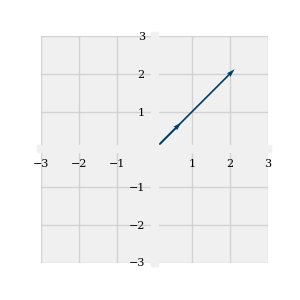

In [70]:
## finding the vector in the original space that landed at u1 by the transformation
## = u1 * C_inv 
C_inv = linalg.inv( C )
v1 = C_inv.dot( u1 )

print( "Semiminor V: ", u1 )
print( "Original V: ",v1)

print( "Norm u1: ", linalg.norm(u1))
print( "Norm v1: ", linalg.norm(v1))

plot_vector( [u1, v1])

- The vector that landed on the **semi-major axis was only scaled** by the effect of $C$ and by a factor of the 3

$$ C \mathbf{v}_1 = s_1  \mathbf{v}_1 $$

Semiminor V:  [ 0.70710678 -0.70710678]
Original V:  [ 0.70710678 -0.70710678]
Norm u2:  0.9999999999999999
Norm v2:  0.9999999999999999


<IPython.core.display.Javascript object>


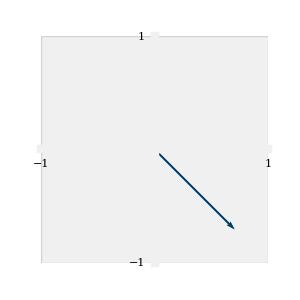

In [71]:
## Finding vector on semi-minor axis and pointing down
s2 = semi_minor / np.sqrt(2)
u2 = np.array( [s2, -s2])
print( "Semiminor V: ", u2 )
v2 = C_inv.dot(u2)
print( "Original V: ",v2)


print( "Norm u2: ", linalg.norm(u2))
print( "Norm v2: ", linalg.norm(v2))

plot_vector([u2, v2])


- Effect of the transformation on the **semi-minor is just to scale** it and in this case by a factor of 1


## Eigen Vectors 
- The vectors that align with the semi-minor and semi-major of the transformation are special and are called eigen vectors of the transformation matrix $C$

- The effect of a transformation on the eigen vectors is just to scale it. They never get thrown off their span; they do not change direction after a linear transformation 

# Matrix = System of Equations

- If $$A\mathbf{x} = \mathbf{c}$$ 
- Then $$ C^-1 \mathbf{c} = \mathbf{x} $$


**So say**
$$ \mathbf{c} = [1, 5]$$
Then
$$ x + y = 1 $$
$$ -x + y = 5 $$

So 
$$ y = 1 - x $$
$$ y = 5 + x $$

In [73]:
## recall 
print( f"A = \n{A}" )

A = 
[[ 1  1]
 [-1  1]]


In [75]:
## find the vector x that resulted in c after transform A
c = np.array( [1,5])
print( f"c = {c}" )
x = linalg.inv(A).dot(c)
print(f"x in C.x = c: {x}" )

c = [1 5]
x in C.x = c: [-2.  3.]


<IPython.core.display.Javascript object>


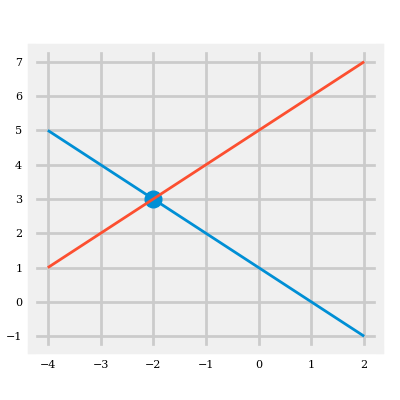

In [81]:
## Geometrically, the line represented by the two equations above : y = 1 - x  AND y = 5 + x 
xvalz = np.linspace(-4, 2)
## from y = mx + c 
m1, b1, m2, b2 = -1, 1, 1, 5

plt.figure(figsize=(2,2))
plt.plot(xvalz, m1*xvalz+b1)
plt.plot(xvalz, m2*xvalz+b2)
plt.scatter( x[0], x[1]); ## the solution x is at the intersection: C_inv.dot(c) = x

In [83]:
## Numpy has built in facility to solve the linear system of eqs
linalg.solve(A, c)

array([-2.,  3.])

## Singular Matrices - No Inverse Matrix
- D is made up of colinear vectors so they are not basis vectors and lie on same line 
- No inverse matrix; No linear transformation that can expand it into the entire 2d space 

**How to Solve for this case** 
- Look at it as the row by row system of equations so that 
$$ y = -1  - 2x $$
$$ y = (5 - x)/0.5 $$

- The geometric solution also shows parallel equations; they don't have a solution. The matrix has no solution, no inverse and is

- This is called an **inconsistent linear system**

- if the RHS vector were itself colinear with the matrix then they'd be on top of each other and result in infinite solutions. The matrix multiplication output is a scalar - transformation between spaces of different dimensions. This leads to **Non-square matrices**

- 

array([[-2. , -1. ],
       [ 1. ,  0.5]])

<IPython.core.display.Javascript object>


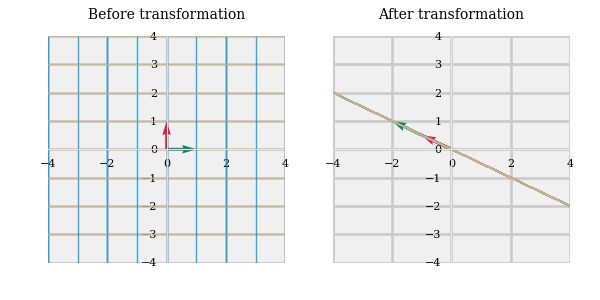

In [86]:
### Another example << with colinear vectors <<, There's no inverse for this
D = np.array( [[-2, -1], [1, 0.5] ] )
D
plot_linear_transformation(D)

In [88]:
## no inverse matrix b/c colinear component vectors 
linalg.solve(D, c)

LinAlgError: Singular matrix

<IPython.core.display.Javascript object>


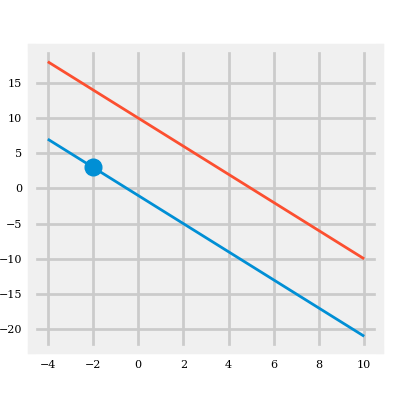

In [90]:
## Geometrically, the line represented by the two equations above : y = 1 - x  AND y = 5 + x 
xvalz = np.linspace(-4, 10)
## from y = mx + c 
m1, b1, m2, b2 = -2, -1, -2, 10

plt.figure(figsize=(2,2))
plt.plot(xvalz, m1*xvalz+b1)
plt.plot(xvalz, m2*xvalz+b2)

## Matrix = Change of Basis

In [94]:
## Express V as linear combinations of a and b (instead of the standard basis i and j)
a = np.array([2,1])
b = np.array([1, 2])
v = np.array([-3, 0])
print(C)

[[2 1]
 [1 2]]


$\mathbf{v}$ using $\mathbf{a}$ and $\mathbf{b}$ basis is same as asking what coordinates of $\mathbf{x}$ are such that $$C \mathbf{x} = \mathbf{v} $$


- $C$ converts into the standard basis, and so C_inverse would convert from standard basis to the new basis 

- So,to apply a transformation on a new basis, then convert to stardad basis, do transformation (say rotation $R$) then convert back to the new basis
$$ {C^-}1 R C \mathbf{x} $$

- Not all matrices are change of basis; see case of singular matrices. 

- Linear transformations (rotate, shear, scale, identity) change vectors in the same basis. As a change of basis the matrix can express the very same vector on a different coordinate system (the new basis)


In [97]:
## so solve for x in that equation 
x = linalg.solve(C, v)
print( f"Solution x = {x}")

Solution x = [-2.  1.]


<IPython.core.display.Javascript object>


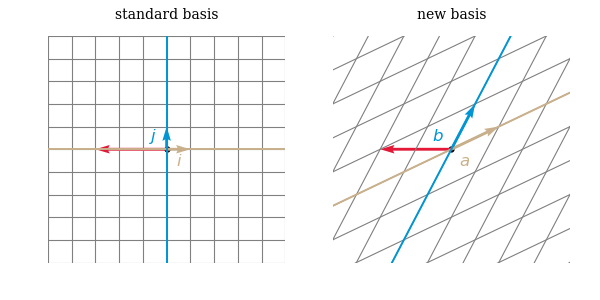

In [99]:
plot_change_basis(a, b, v)

--- 

## Matrices in 3D Space

In [101]:
M = np.array([
    [1, 0, 1],
    [1, 1, 0 ],
    [-1, 1, 1]
])
M

array([[ 1,  0,  1],
       [ 1,  1,  0],
       [-1,  1,  1]])

<IPython.core.display.Javascript object>


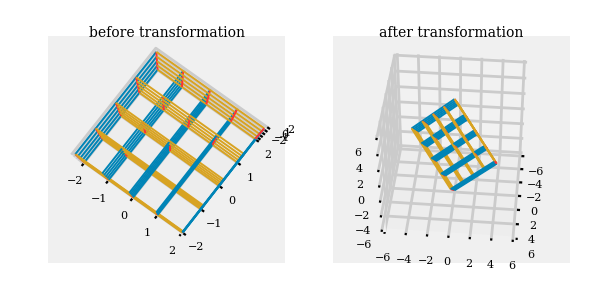

In [102]:
plot_3d_linear_transformation(M)

In [104]:
##Mx = x*mcol1 + y*mcol2 +z*mcol3 <<, as usuall 2D extends to multi-D system of equations 
## Mx = u <<< x is input vector and u is output vector 
u = np.array([-1, 0, 2])

x = linalg.solve(M, u)
x

array([-1.,  1.,  0.])

In [105]:
N = np.array([
    [1, 2, 7],
    [0, 1, 3],
    [-3, 1, 0]
])
N

array([[ 1,  2,  7],
       [ 0,  1,  3],
       [-3,  1,  0]])

<IPython.core.display.Javascript object>


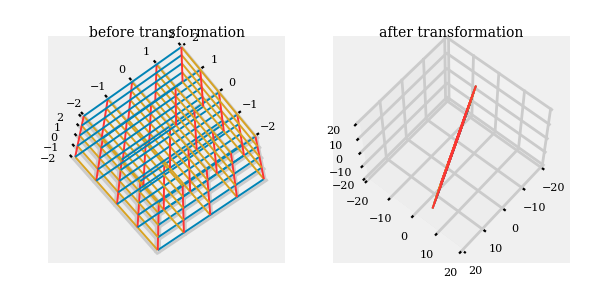

In [106]:
plot_3d_linear_transformation(N)

**in some cases the 3d gets transformed into a flat 2D plane**
- If you look at the linear system of equations with the [0,0,0] vector on the RHS, you'll see that two equations become the same and can call z a free variable b/c any z can satisfy the system.

- **Homogenous system**: A linear system with a zero-vector in the RHS
- **Nullspace** of N or **kernel** is the set of solutions to the homogenous system $N.\mathbf{x} = 0$ 

- The nullspace of N is all the scalings of z*[-1, -3, 1] in this case. it is a line. A 1D space

- if The nullspace has a non-zero dimension (i.e. zero vector is not its only solution) it means that it's columns are **linearly dependent**. 

- Recall that not all matrices can ba a change of basis. To be a change of basis all columns must be linearly independent 

- **Rank** is the dimension of the column space of a matrix. E.g. in below case is changed from 3D to 2D space and so the rank is 2. 
The matrix N is therefore **rank deficient** or **singular** matrix

- use `np.linalg.matrix_rank`


In [109]:
## rank of N = is rank deficient or singular. So no inverse 
print( f"rank of M = {linalg.matrix_rank(M) } and shape of M = {M.shape}")
print( f"rank of N = {linalg.matrix_rank(N) } and shape of N = {N.shape}")

rank of M = 3 and shape of M = (3, 3)
rank of N = 2 and shape of N = (3, 3)


In [117]:
##N is singular, so no inverse, no solution or what ???? << under 2D being singular made it non-invertible. What's up here??
print( linalg.inv(N))
linalg.solve(N, u)

[[ 2.57348550e+15 -6.00479950e+15  8.57828500e+14]
 [ 7.72045650e+15 -1.80143985e+16  2.57348550e+15]
 [-2.57348550e+15  6.00479950e+15 -8.57828500e+14]]


array([-8.5782850e+14, -2.5734855e+15,  8.5782850e+14])

array([[ 1,  2,  1],
       [-1, -2, -1],
       [ 3,  6,  3]])

rank of L = 1 and shape of L = (3, 3)


<IPython.core.display.Javascript object>


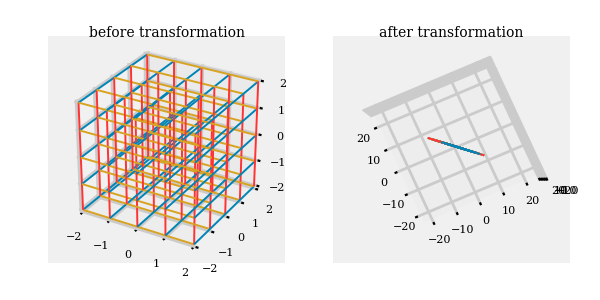

In [115]:
L = np.array([
    [1, 2, 1],
    [-1, -2, -1],
    [3, 6, 3]
])
L
print( f"rank of L = {linalg.matrix_rank(L) } and shape of L = {L.shape}")

plot_3d_linear_transformation(L)

**Everything is on 1D plane** $L$ has rank 1